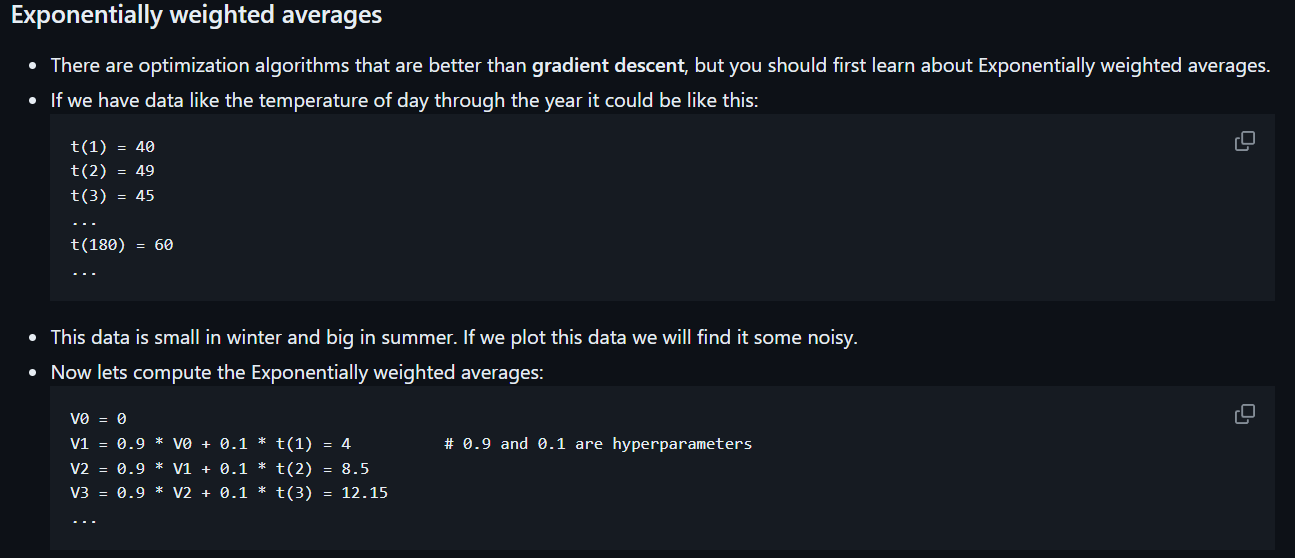

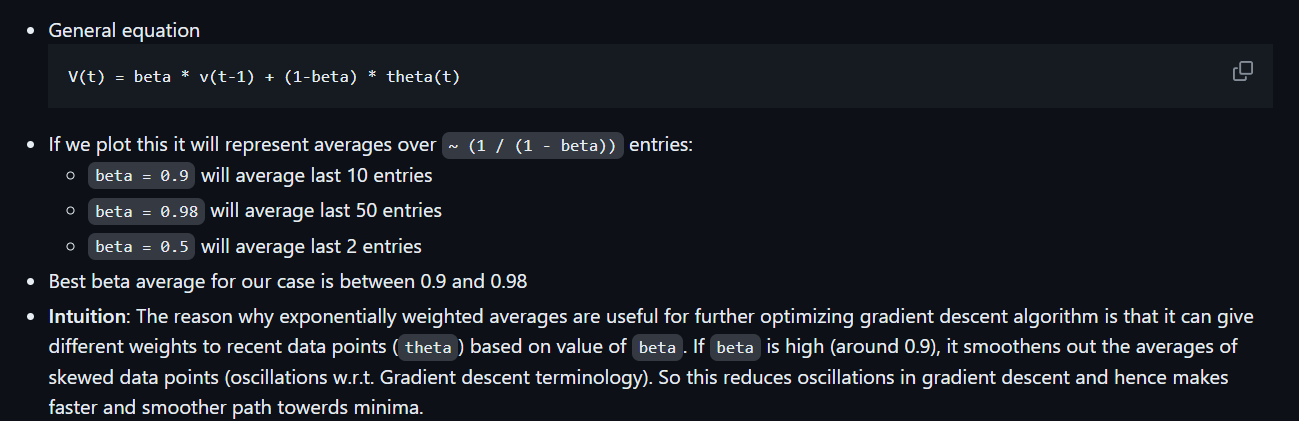

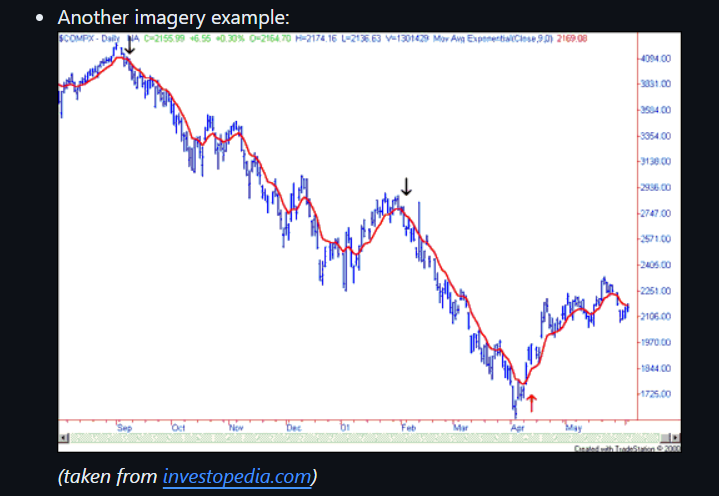

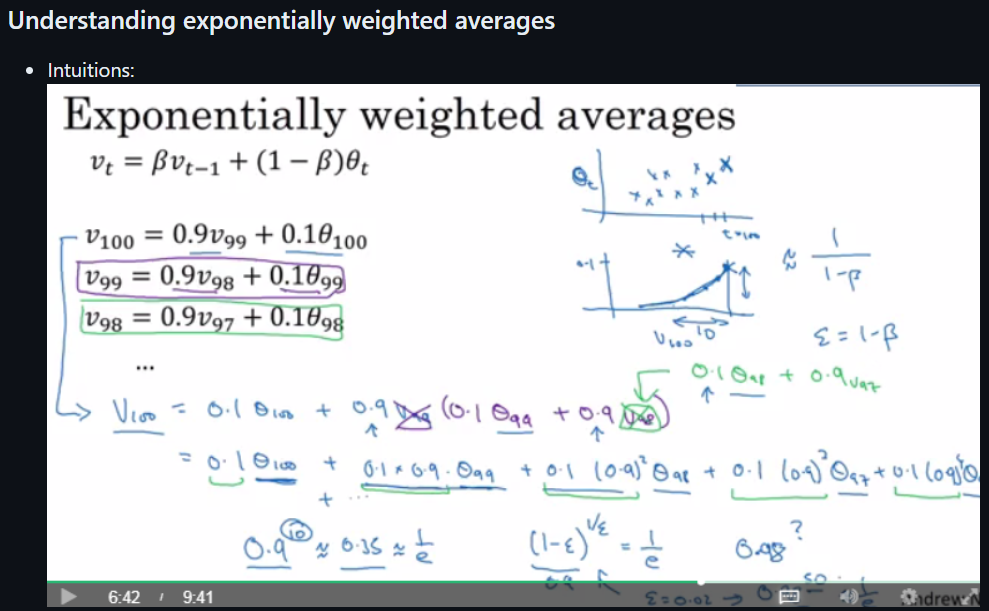

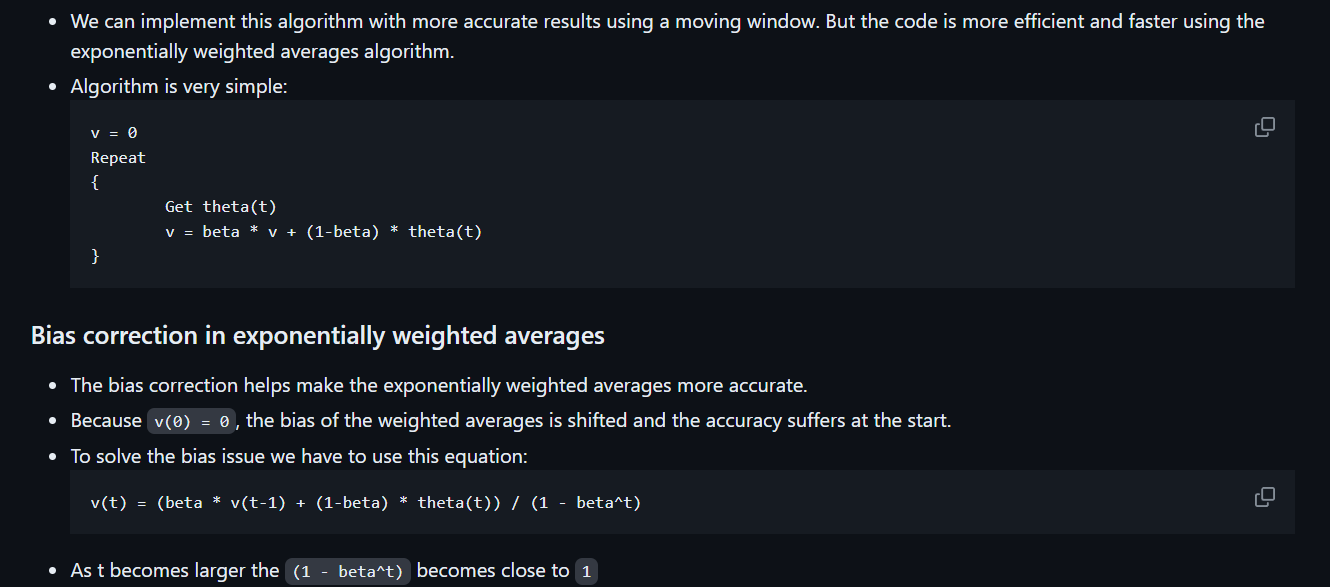

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess data
train_images = train_images.reshape((60000, 784)).astype('float32') / 255
test_images = test_images.reshape((10000, 784)).astype('float32') / 255

# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

# Compile the model with Adam optimizer
optimizer = Adam()

# Initializations for exponentially weighted averages with bias correction
beta = 0.9
v = [tf.zeros_like(param) for param in model.trainable_variables]
v_corrected = [tf.zeros_like(param) for param in model.trainable_variables]
epsilon = 1e-7  # Small constant to prevent division by zero
global_step = 0

# Training loop
epochs = 10
batch_size = 128
steps_per_epoch = len(train_images) // batch_size

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    for step in range(steps_per_epoch):
        global_step += 1
        # Get batch of training data
        batch_images = train_images[step * batch_size:(step + 1) * batch_size]
        batch_labels = train_labels[step * batch_size:(step + 1) * batch_size]

        # Compute gradients for the batch
        with tf.GradientTape() as tape:
            logits = model(batch_images, training=True)
            loss = tf.keras.losses.sparse_categorical_crossentropy(batch_labels, logits)

        gradients = tape.gradient(loss, model.trainable_variables)

        # Update parameters using Adam optimizer with EWA and bias correction
        for i, (param, grad) in enumerate(zip(model.trainable_variables, gradients)):
            v[i] = beta * v[i] + (1 - beta) * grad
            v_corrected[i] = v[i] / (1 - beta ** global_step)  # Bias correction
            param.assign_sub(optimizer.learning_rate * v_corrected[i])

    # Evaluate model performance at the end of each epoch
    test_loss = tf.keras.metrics.Mean()
    test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    for test_images_batch, test_labels_batch in tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size):
        test_logits = model(test_images_batch, training=False)
        test_loss(tf.keras.losses.sparse_categorical_crossentropy(test_labels_batch, test_logits))
        test_accuracy(test_labels_batch, test_logits)

    print(f"Test loss: {test_loss.result().numpy()}, Test accuracy: {test_accuracy.result().numpy()}")

print("Training completed!")

Epoch 1/10
Test loss: 0.26295337080955505, Test accuracy: 0.9251999855041504
Epoch 2/10
Test loss: 0.19966384768486023, Test accuracy: 0.944100022315979
Epoch 3/10
Test loss: 0.1663372665643692, Test accuracy: 0.9524000287055969
Epoch 4/10
Test loss: 0.14479251205921173, Test accuracy: 0.9570000171661377
Epoch 5/10
Test loss: 0.12967321276664734, Test accuracy: 0.9609000086784363
Epoch 6/10
Test loss: 0.11823786795139313, Test accuracy: 0.9649999737739563
Epoch 7/10
Test loss: 0.10974793881177902, Test accuracy: 0.9675999879837036
Epoch 8/10
Test loss: 0.10327347368001938, Test accuracy: 0.9703999757766724
Epoch 9/10
Test loss: 0.09819439053535461, Test accuracy: 0.9715999960899353
Epoch 10/10
Test loss: 0.09388352185487747, Test accuracy: 0.9728000164031982
Training completed!


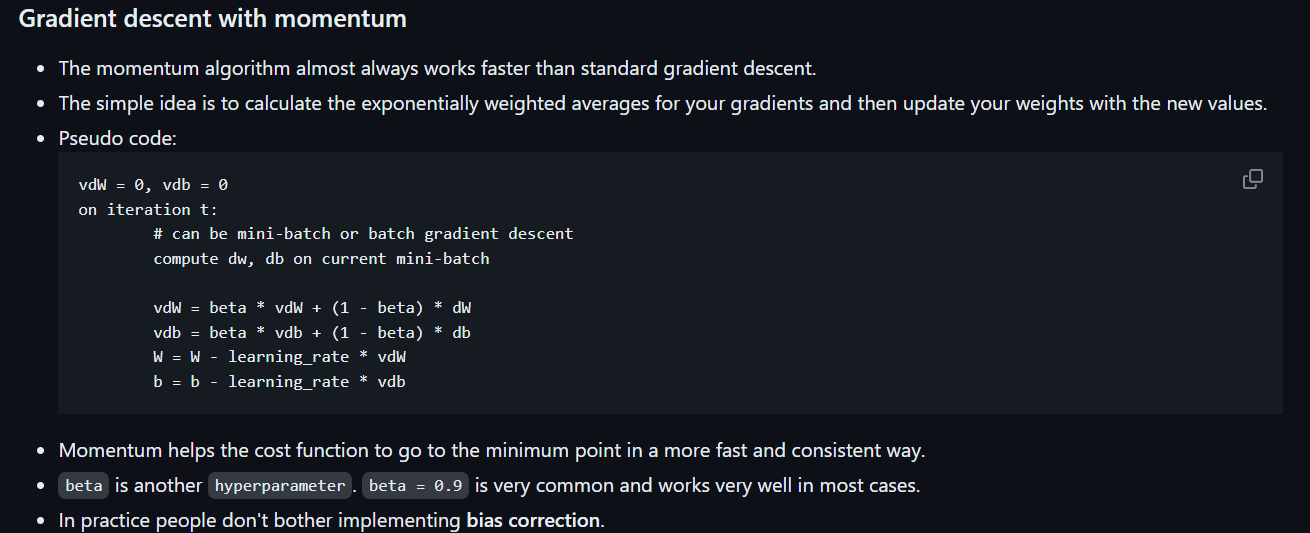

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
import numpy as np

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model with SGD optimizer and momentum
optimizer = SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the CNN model
epochs = 10
batch_size = 128

model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

Epoch 1/10
469/469 [==============================] - 49s 102ms/step - loss: 0.3702 - accuracy: 0.8875
Epoch 2/10
469/469 [==============================] - 47s 99ms/step - loss: 0.0940 - accuracy: 0.9708
Epoch 3/10
469/469 [==============================] - 50s 107ms/step - loss: 0.0680 - accuracy: 0.9787
Epoch 4/10
469/469 [==============================] - 45s 96ms/step - loss: 0.0532 - accuracy: 0.9830
Epoch 5/10
469/469 [==============================] - 45s 96ms/step - loss: 0.0434 - accuracy: 0.9861
Epoch 6/10
469/469 [==============================] - 45s 95ms/step - loss: 0.0374 - accuracy: 0.9882
Epoch 7/10
469/469 [==============================] - 46s 97ms/step - loss: 0.0327 - accuracy: 0.9895
Epoch 8/10
469/469 [==============================] - 44s 94ms/step - loss: 0.0277 - accuracy: 0.9912
Epoch 9/10
469/469 [==============================] - 45s 97ms/step - loss: 0.0246 - accuracy: 0.9920
Epoch 10/10
469/469 [==============================] - 45s 95ms/step - loss: 0.0

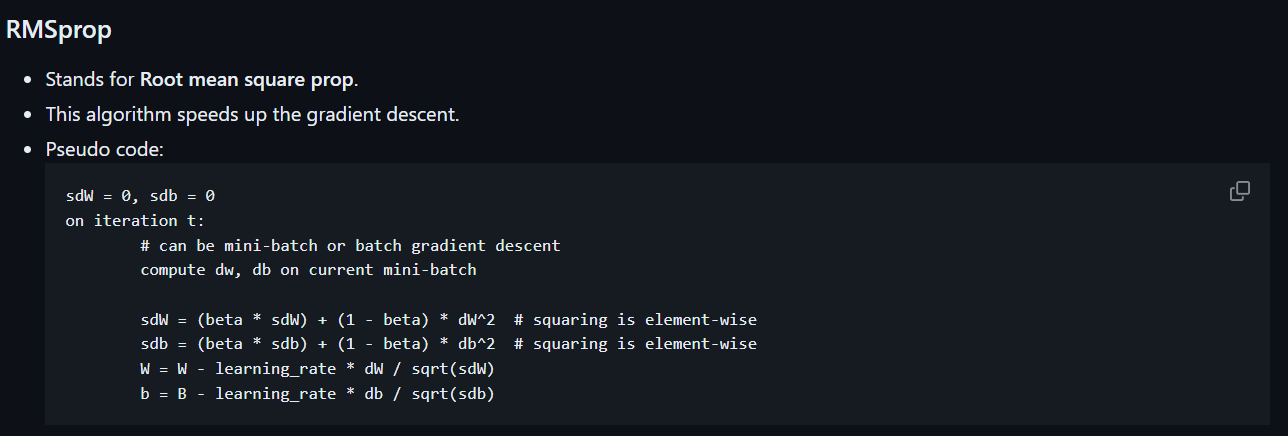

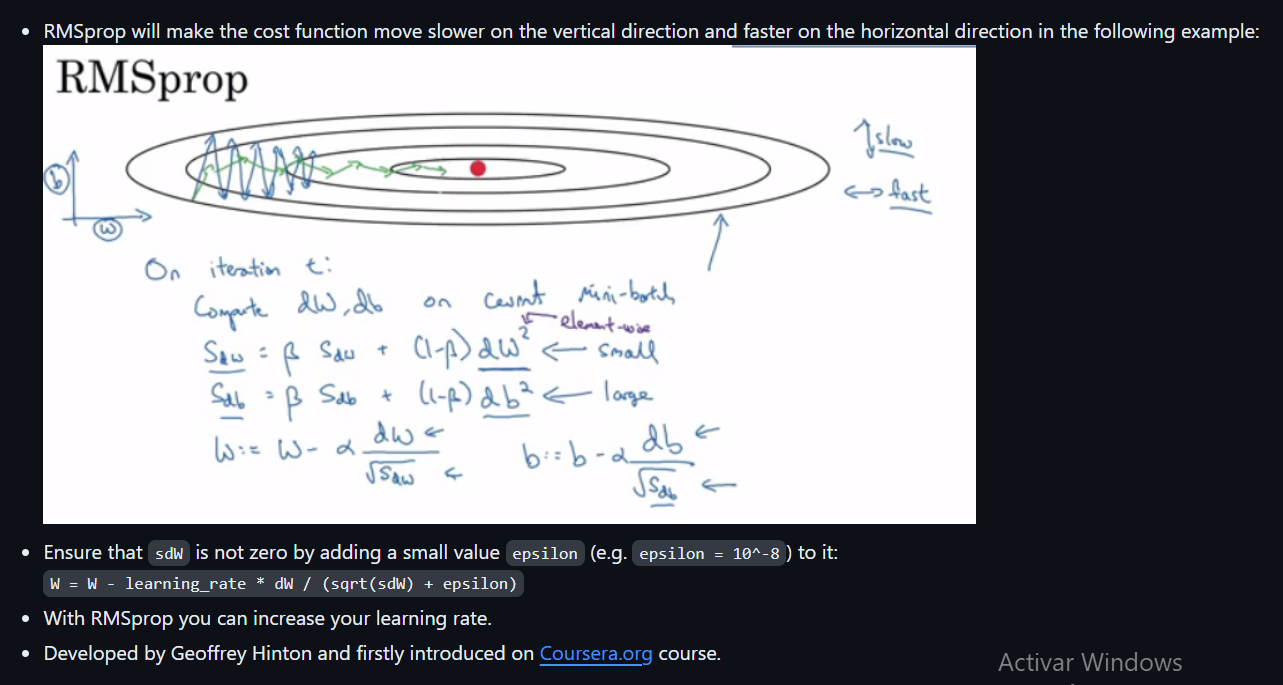

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop
import numpy as np

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.9)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the CNN model
epochs = 10
batch_size = 128

model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

Epoch 1/10
469/469 [==============================] - 44s 93ms/step - loss: 0.2321 - accuracy: 0.9279
Epoch 2/10
469/469 [==============================] - 44s 93ms/step - loss: 0.0565 - accuracy: 0.9820
Epoch 3/10
469/469 [==============================] - 46s 97ms/step - loss: 0.0376 - accuracy: 0.9885
Epoch 4/10
469/469 [==============================] - 47s 101ms/step - loss: 0.0269 - accuracy: 0.9915
Epoch 5/10
469/469 [==============================] - 44s 95ms/step - loss: 0.0209 - accuracy: 0.9933
Epoch 6/10
469/469 [==============================] - 44s 94ms/step - loss: 0.0165 - accuracy: 0.9948
Epoch 7/10
469/469 [==============================] - 46s 97ms/step - loss: 0.0127 - accuracy: 0.9960
Epoch 8/10
469/469 [==============================] - 45s 96ms/step - loss: 0.0098 - accuracy: 0.9973
Epoch 9/10
469/469 [==============================] - 45s 95ms/step - loss: 0.0076 - accuracy: 0.9975
Epoch 10/10
469/469 [==============================] - 44s 93ms/step - loss: 0.00